In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd

# Loading the data from the file into mat
mat = loadmat("Project Datasets/ECGITtrain.mat")
#print(mat)

XXtrain = mat["inputECGITtrain"] # matrix of 200 rows and 312 features

ytrain = mat["outputECGITtrain"] # vector of 200 rows
print("XXtrain shape",XXtrain.shape)
print("ytrain shape",ytrain.shape)


XXtrain shape (200, 312)
ytrain shape (200, 1)


In [2]:
C1 = XXtrain[:,19:26]   
#print("Channel 1",C1)
C2 = XXtrain[:,45:52]
#print("Channel 2",C2)
C3 = XXtrain[:,71:78]
#print("Channel 3",C2)
C4 = XXtrain[:,97:104]
#print("Channel 4",C2)
C5 = XXtrain[:,123:130]
#print("Channel 5",C2)
C6 = XXtrain[:,149:156]
#print("Channel 6",C2)
C7 = XXtrain[:,175:182]
#print("Channel 7",C2)
C8 = XXtrain[:,201:208]
#print("Channel 8",C2)
C9 = XXtrain[:,227:234]
#print("Channel 9",C2)
C10 = XXtrain[:,253:260]
#print("Channel 10",C2)
C11 = XXtrain[:,279:286]
#print("Channel 11",C2)
C12 = XXtrain[:,305:312]
#print("Channel 12",C2)

d1 = np.append(C1, C2, axis=1)
d1 = np.append(d1, C3, axis=1)
d1 = np.append(d1, C4, axis=1)
d1 = np.append(d1, C5, axis=1)
d1 = np.append(d1, C6, axis=1)
d1 = np.append(d1, C7, axis=1)
d1 = np.append(d1, C8, axis=1)
d1 = np.append(d1, C9, axis=1)
d1 = np.append(d1, C10, axis=1)
d1 = np.append(d1, C11, axis=1)
Xtrain = np.append(d1, C12, axis=1)
print("Xtrain shape",Xtrain.shape)
ytrain = np.ravel(ytrain)
print("ytrain shape after reshape",ytrain.shape)


Xtrain shape (200, 84)
ytrain shape after reshape (200,)


In [3]:
#Standard scaling is done if the difference between features values is very high otherwise no need. (preprocessing)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalize = scaler.fit_transform(Xtrain)
print(X_normalize[:5,:5])

[[ 1.36779444  0.56835858 -0.58605598 -0.62999496 -0.63417844]
 [-0.98347552  0.38353729  0.57107342  3.01116756  2.51055967]
 [ 0.55362493 -0.75345378 -0.58605598 -0.62999496 -0.63417844]
 [-0.98347552  0.20257712  0.36283601  1.11921917  1.25660321]
 [ 0.48690019  1.00887809  0.92016061  2.20314582 -0.63417844]]


In [4]:
from sklearn.decomposition import PCA
pca =PCA(n_components=15) #n_components means the whole features are decomposed into 2 features
pca.fit(X_normalize)
Xtrain_pca=pca.transform(X_normalize)
print(Xtrain.shape)
print(Xtrain_pca.shape)
print(ytrain.shape)
print(Xtrain_pca[:5,:5])
print(ytrain[:5])

(200, 84)
(200, 15)
(200,)
[[ 6.23305705 -1.1986911   2.12096817  2.93630748  0.01385862]
 [-2.13324932 -0.22635854  1.53040783 -2.17708802 -0.1313909 ]
 [ 3.69168439 -0.16063487  5.35903437  9.76820449  3.47721107]
 [-6.20338779 -4.31648172 -0.59957394 -0.22817339 -0.39818866]
 [ 0.5006318   0.40421842 -1.81171077  1.04303651 -0.98473121]]
[1 0 0 0 0]


In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain_pca, ytrain, test_size=1/4, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
ypredtrain = classifier.predict(Xtrain)
print(ypredtrain)
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,ypredtrain)

[1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1
 0 1]


0.8266666666666667

In [8]:
ypredval = classifier.predict(Xval)
print(ypredval)
from sklearn.metrics import accuracy_score
accuracy_score(yval,ypredval)

[0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 1]


0.72

In [9]:
from sklearn.model_selection import GridSearchCV

#Hyper Parameters Set
n_neighbors = list(range(1,30))
params = {'n_neighbors':n_neighbors, 'weights':['uniform', 'distance'],}

#Making models with hyper parameters sets
model_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=4)

#Learning
model_knn.fit(Xtrain,ytrain)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model_knn.best_params_)

Best Hyper Parameters:
 {'n_neighbors': 6, 'weights': 'distance'}


Cross Validation of dtata
The K value is  1  and the accuracy is  0.7533333333333333
The K value is  7  and the accuracy is  0.7533333333333333


<IPython.core.display.Javascript object>


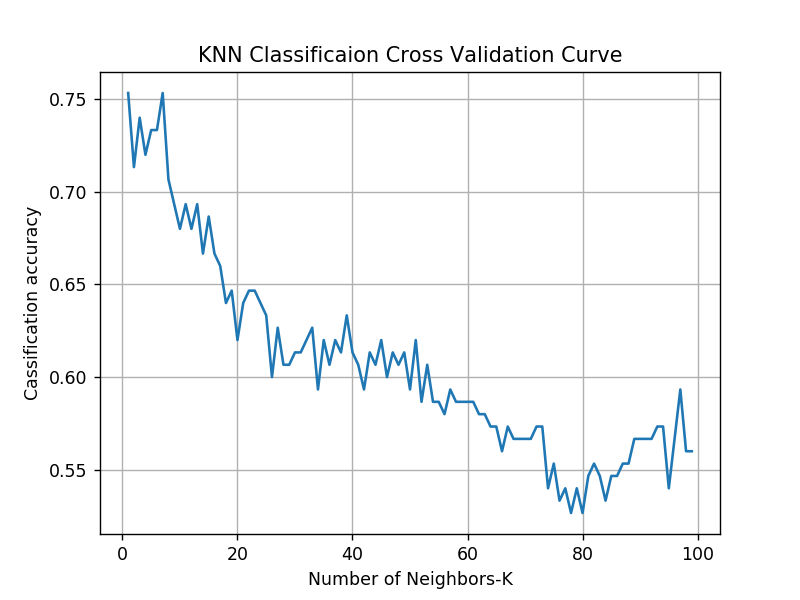

In [10]:
from sklearn.model_selection import cross_val_score
print ("Cross Validation of dtata")
k_values = list(range(1,100))
cv_scores ={}
# perform 10-fold cross validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,Xtrain, ytrain, cv=10, scoring='accuracy')
    cv_scores.update({k:(scores.mean())})

MCE = [1 - x for x in cv_scores.values()]

# determining best k
for i,j in cv_scores.items():
    if j==max(cv_scores.values()):
        print ("The K value is ",i," and the accuracy is ",j)

# plot
fig, ax = plt.subplots()

# plot the "K" vs "MCE"
ax.plot(list(cv_scores.keys()), list(cv_scores.values()))

ax.set_xlabel("Number of Neighbors-K")
ax.set_ylabel("Cassification accuracy")
ax.set_title("KNN Classificaion Cross Validation Curve")
ax.grid()
fig.show()

In [11]:
#Prediction
ybestval=model_knn.predict(Xval)
print("yval\n",yval[:5])
print("ybestval\n",ybestval[:5])

yval
 [1 0 1 1 0]
ybestval
 [0 1 1 1 1]


In [12]:
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(yval,ybestval))

Accuracy: 0.78


In [13]:
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

# Create logistic regression
logistic = linear_model.LogisticRegression()

logistic.fit(Xtrain, ytrain)

ypredtrain = logistic.predict(Xtrain)
print(ypredtrain)

from sklearn.metrics import accuracy_score
accuracy_score(ytrain,ypredtrain)

ypredval = logistic.predict(Xval)
print(ypredval)

from sklearn.metrics import accuracy_score
accuracy_score(yval,ypredval)

[1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 1]
[1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1]


0.76

In [14]:
from sklearn.model_selection import GridSearchCV

#Hyper Parameters Set
grid_values = {'C': [0.001,0.01,0.1,1,10,100,1000]}

#Making models with hyper parameters sets
model = GridSearchCV(logistic, param_grid=grid_values, cv=4)

#Learning
model.fit(Xtrain,ytrain)

#The best hyper parameters set
print("Best Hyper Parameters with GridSearchCV:\n",model.best_params_)

#Prediction
ybestval=model.predict(Xval)
print(ybestval)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(yval,ybestval))

Best Hyper Parameters with GridSearchCV:
 {'C': 0.01}
[0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 1]
Accuracy: 0.7
